In [1]:
from sklearn.datasets import make_circles


(1000, 2)
(1000,)
[0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1
 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 

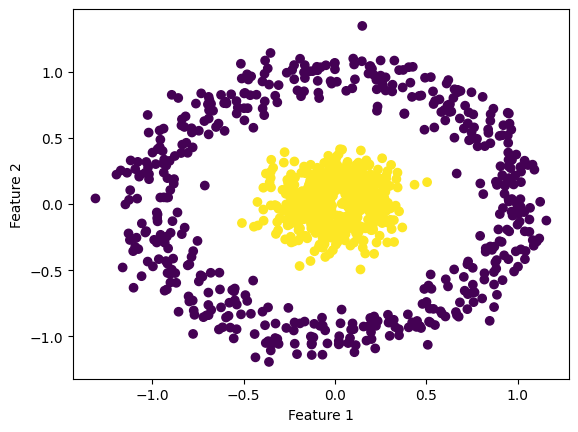

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=21)
print(X.shape)
print(y.shape)
print(y)
print(X)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
# dbscan algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.12,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.12)

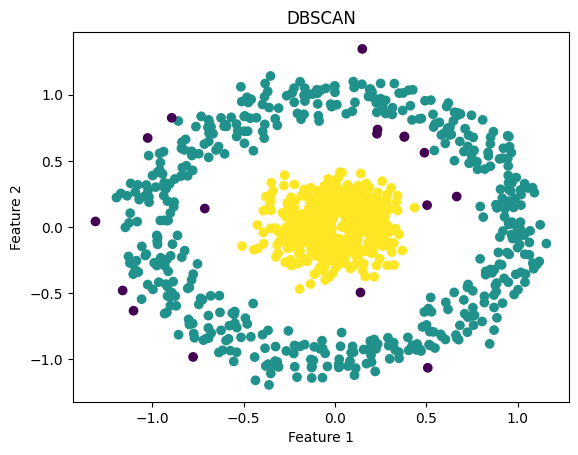

In [4]:
# plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# **Mall Customer Dataset**

In [5]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X_train = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X_train.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
# DBScan Clustering

dbscan = DBSCAN(eps=16,min_samples=10)
clusters = dbscan.fit(X_train)

In [8]:
# Add clusters to dataset
df['cluster'] = clusters.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


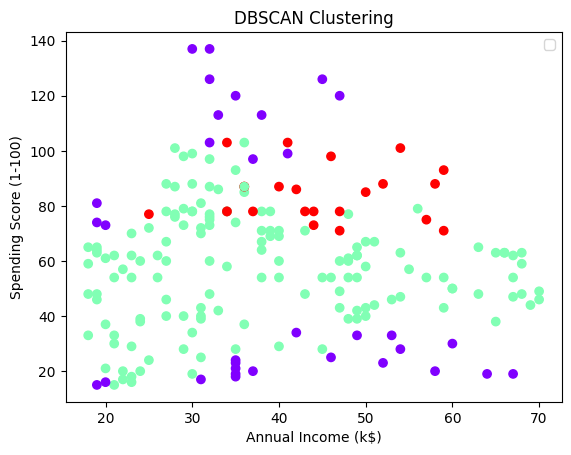

In [9]:
# visualisation

plt.scatter(df['Age'],df['Annual Income (k$)'],c=df['cluster'],cmap='rainbow')
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

In [10]:
df['cluster'].value_counts()

,count
cluster,
0,144
-1,33
1,23


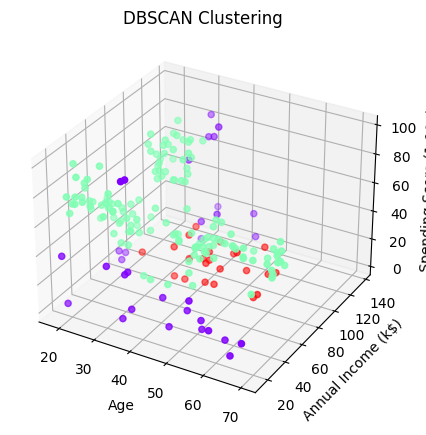

In [12]:
# 3d

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['cluster'],cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('DBSCAN Clustering')
plt.show()